<div class="usecase-title">Melbourne House Market Analysis</div>

<div class="usecase-authors"><b>Authored by: </b>Bao Ngo</div>

<div class="usecase-date"><b>Date: </b> July 2024</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill"></div>
    <div class="usecase-level"><b> Level: </b>Intermediate</div>
    <div class="usecase-skill"><b> Pre-requisite Skills: </b>Python </div>

<div class="usecase-section-header">Scenario</div>

1. Introduction:
The aim of this proposal is to leverage available datasets to create a comprehensive analysis of the Melbourne housing market. By utilizing various datasets provided by the City of Melbourne and external sources such as Kaggle, we aim to develop insights into housing price trends, identify factors influencing house prices, and provide valuable information for buyers, sellers, real estate agents, investors, and policymakers.

2. Objectives:
Analyze the Melbourne House Prices dataset to understand historical and current housing price trends.
Utilize data on property sales transactions to assess market activity and price fluctuations.
Combine insights from various datasets to forecast future housing prices and identify high-demand areas.

3. Methodology:
Data Collection: Gather datasets from the City of Melbourne Open Data site and Kaggle, including Melbourne House Prices.
Data Cleaning and Preparation: Clean and preprocess the datasets to ensure consistency and accuracy.
Data Analysis: Perform statistical analysis, data visualization, and trend analysis to identify patterns, forecast house prices.
Reporting: Generate reports, visualizations, and insights to present findings to stakeholders.

4. Proposed Deliverables:
Comprehensive analysis report on housing market trends in Melbourne.
Visualizations depicting historical and current house price trends and high-demand areas.
Forecasts of future house prices with recommendations for buyers, sellers, and policymakers.

5. Timeline:
Data Collection and Cleaning: 2 weeks
Data Analysis and Visualization: 3 weeks
Report Writing and Presentation: 1 week

### Libraries Used

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import math
from io import StringIO
from geopy.distance import geodesic
from folium.plugins import MarkerCluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Dependencies
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
import io
pd.set_option('display.max_columns', None)

In [2]:
# Function to collect datasets using API

def datasetcollect(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = " "
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
        #'api_key': apikey
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f'Request failed with status code {response.status_code}')

### Dataset 1: 

In [7]:
dataset_id = 'house-prices-by-small-area-sale-year'
price_area = datasetcollect(dataset_id)
print(len(price_area))

347


In [8]:
price_area.head()

,sale_year,small_area,type,median_price,transaction_count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42
3,2000,East Melbourne,Residential Apartment,295000.0,139
4,2000,Kensington,House/Townhouse,215250.0,258


In [9]:
price_area.value_counts()

sale_year  small_area                    type                   median_price  transaction_count
2000       Carlton                       House/Townhouse        316250.0      116                  1
2011       East Melbourne                House/Townhouse        1352500.0     30                   1
           North Melbourne               Residential Apartment  438000.0      208                  1
                                         House/Townhouse        724750.0      110                  1
           Melbourne (Remainder)         Residential Apartment  631250.0      68                   1
                                                                                                  ..
2005       South Yarra                   House/Townhouse        870000.0      43                   1
           Parkville                     Residential Apartment  295000.0      71                   1
                                         House/Townhouse        845000.0      66                

In [10]:
price_area.describe()

,sale_year,median_price,transaction_count
count,347.000000,3.190000e+02,347.000000
mean,2008.268012,6.612860e+05,277.051873
std,4.928411,8.863439e+05,480.421188
min,2000.000000,0.000000e+00,1.000000
25%,2004.000000,3.662810e+05,44.500000
50%,2008.000000,4.873000e+05,118.000000
75%,2013.000000,6.787500e+05,224.000000
max,2016.000000,1.430000e+07,3766.000000


In [13]:
# # Trend analysis
# print("\nTrend Analysis:")
# # Overall trend of job forecasts over the years
# yearly_totals = job_forecast.groupby('year')['value'].sum()
# print(yearly_totals)

# # Industry analysis
# print("\nIndustry Analysis:")
# # Group data by 'industry_space_use' and calculate total jobs per industry
# industry_totals = job_forecast.groupby('industry_space_use')['value'].sum()
# print(industry_totals)

In [12]:
# plt.figure(figsize=(10, 6))
# plt.plot(yearly_totals.index, yearly_totals.values, marker='o')
# plt.xlabel('Year')
# plt.ylabel('Number of Jobs')
# plt.title('Job Forecasts Over Years')
# plt.grid(True)
# plt.xticks(yearly_totals.index)
# plt.tight_layout()
# plt.show()

In [11]:
# # Exclude 'Total jobs' from industry_totals
# industry_totals_filtered = industry_totals.drop('Total jobs')

# # Industry Analysis Visualization (Horizontal Bar Chart)
# plt.figure(figsize=(16, 10))  # Adjust figure size for horizontal chart
# industry_totals_filtered_sorted = industry_totals_filtered.sort_values()  # Sort industries by total jobs (ascending for horizontal chart)
# plt.barh(industry_totals_filtered_sorted.index, industry_totals_filtered_sorted.values)
# plt.xlabel('Number of Jobs')
# plt.ylabel('Industry')
# plt.title('Distribution of Jobs Across Industries')
# plt.tight_layout()
# plt.show()

### Dataset 2: House price

In [14]:
melbourne_house_prices = pd.read_csv("MELBOURNE_HOUSE_PRICES_LESS.csv")


In [15]:
melbourne_house_prices.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [17]:
# Display basic information and summary statistics
print("Dataset Information:")
melbourne_house_prices.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [18]:
print("\nSummary Statistics:")
print(melbourne_house_prices.describe(include='all'))


Summary Statistics:
           Suburb       Address         Rooms   Type         Price Method  \
count       63023         63023  63023.000000  63023  4.843300e+04  63023   
unique        380         57754           NaN      3           NaN      9   
top     Reservoir  5 Charles St           NaN      h           NaN      S   
freq         1241             7           NaN  45053           NaN  34063   
mean          NaN           NaN      3.110595    NaN  9.978982e+05    NaN   
std           NaN           NaN      0.957551    NaN  5.934989e+05    NaN   
min           NaN           NaN      1.000000    NaN  8.500000e+04    NaN   
25%           NaN           NaN      3.000000    NaN  6.200000e+05    NaN   
50%           NaN           NaN      3.000000    NaN  8.300000e+05    NaN   
75%           NaN           NaN      4.000000    NaN  1.220000e+06    NaN   
max           NaN           NaN     31.000000    NaN  1.120000e+07    NaN   

       SellerG        Date      Postcode             R

In [19]:
print("\nMissing Values:")
print(melbourne_house_prices.isnull().sum())


Missing Values:
Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64


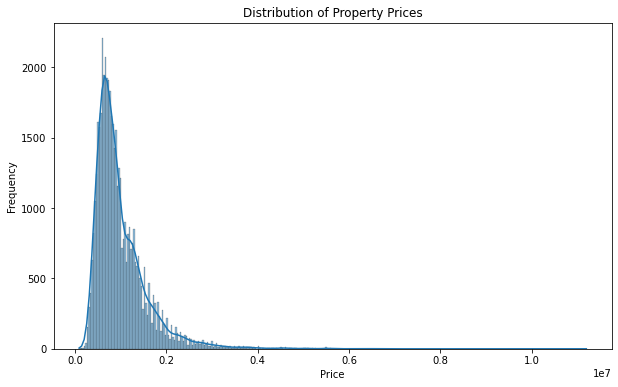

In [20]:
# Plotting distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(melbourne_house_prices['Price'].dropna(), kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

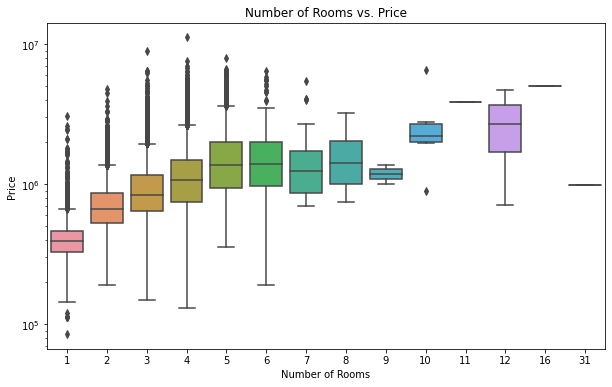

In [21]:
# Plotting number of rooms vs. price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rooms', y='Price', data=melbourne_house_prices)
plt.title('Number of Rooms vs. Price')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.yscale('log')
plt.show()


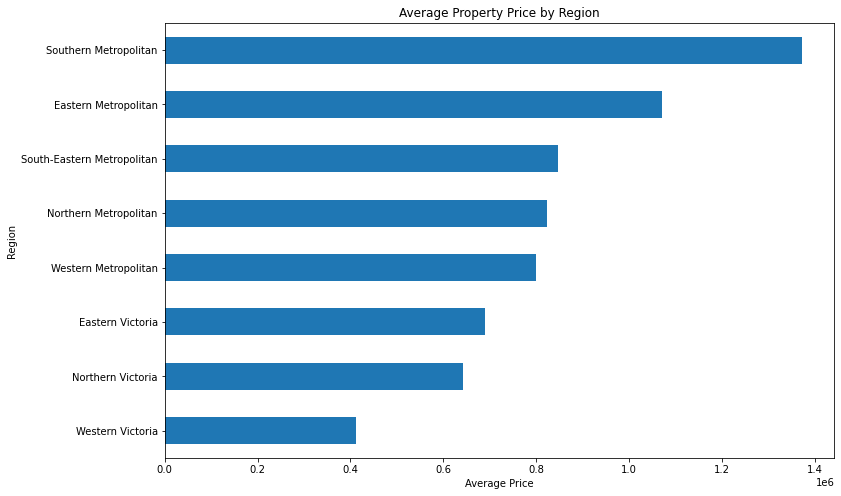

In [22]:
# Average price by region
avg_price_by_region = melbourne_house_prices.groupby('Regionname')['Price'].mean().sort_values()

plt.figure(figsize=(12, 8))
avg_price_by_region.plot(kind='barh')
plt.title('Average Property Price by Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()

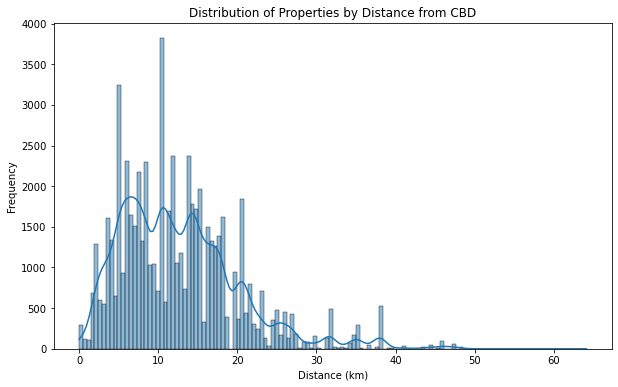

In [23]:
# Distribution of properties by distance from CBD
plt.figure(figsize=(10, 6))
sns.histplot(melbourne_house_prices['Distance'], kde=True)
plt.title('Distribution of Properties by Distance from CBD')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

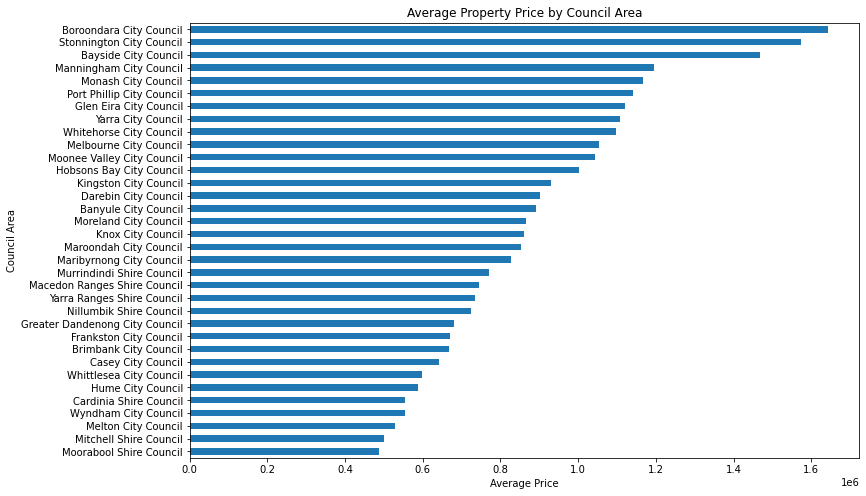

In [24]:
# Average price by council area
avg_price_by_council = melbourne_house_prices.groupby('CouncilArea')['Price'].mean().sort_values()

plt.figure(figsize=(12, 8))
avg_price_by_council.plot(kind='barh')
plt.title('Average Property Price by Council Area')
plt.xlabel('Average Price')
plt.ylabel('Council Area')
plt.show()

### Dataset 3: Business establishments and jobs data by business size and industry

In [14]:
dataset_id_3 = 'business-establishments-and-jobs-data-by-business-size-and-industry'
buss_est = datasetcollect(dataset_id_3)
print(len(buss_est))

14692


In [15]:
buss_est.head()

,census_year,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,2007,West Melbourne (Residential),"Transport, Postal and Warehousing","Transport, Postal and Storage",Small business,20,132.0
1,2006,Carlton,Accommodation and Food Services,Accommodation,Small business,17,102.0
2,2006,Carlton,Administrative and Support Services,Admin and Support Services,Non employing,1,NaN
3,2006,Carlton,Arts and Recreation Services,Arts and Recreation Services,Medium business,4,207.0
4,2006,Carlton,Construction,Construction,Medium business,5,196.0


In [16]:
buss_est.describe()

,census_year,total_establishments,total_jobs
count,14692.000000,14692.000000,10365.000000
mean,2012.155799,64.711135,2458.545586
std,6.016973,485.857098,12828.616392
min,2002.000000,1.000000,0.000000
25%,2007.000000,2.000000,39.000000
50%,2012.000000,6.000000,190.000000
75%,2017.000000,18.000000,890.000000
max,2022.000000,12870.000000,273200.000000


In [17]:
buss_est.count()

census_year             14692
clue_small_area         14692
anzsic_indusrty         14692
clue_industry           14692
business_size           14692
total_establishments    14692
total_jobs              10365
dtype: int64

In [18]:
# Data Cleaning and Preparation
# Check for missing values
missing_values = buss_est.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 census_year                0
clue_small_area            0
anzsic_indusrty            0
clue_industry              0
business_size              0
total_establishments       0
total_jobs              4327
dtype: int64


In [19]:
# Descriptive Analysis
summary_stats = buss_est.groupby('clue_industry')[['total_establishments', 'total_jobs']].sum()
print("\nSummary Statistics:\n", summary_stats)



Summary Statistics:
                                             total_establishments  total_jobs
clue_industry                                                               
Accommodation                                              11048    353380.0
Admin and Support Services                                 27360    542547.0
Agriculture and Mining                                      2630    101691.0
All CLUE Industry                                         316912   8803643.0
Arts and Recreation Services                               23330    862438.0
Business Services                                         105570   2851776.0
Construction                                               11470    189123.0
Education and Training                                     21272    884214.0
Electricity, Gas, Water and Waste Services                  7856    295519.0
Finance and Insurance                                      36928   2419405.0
Food and Beverage Services                            

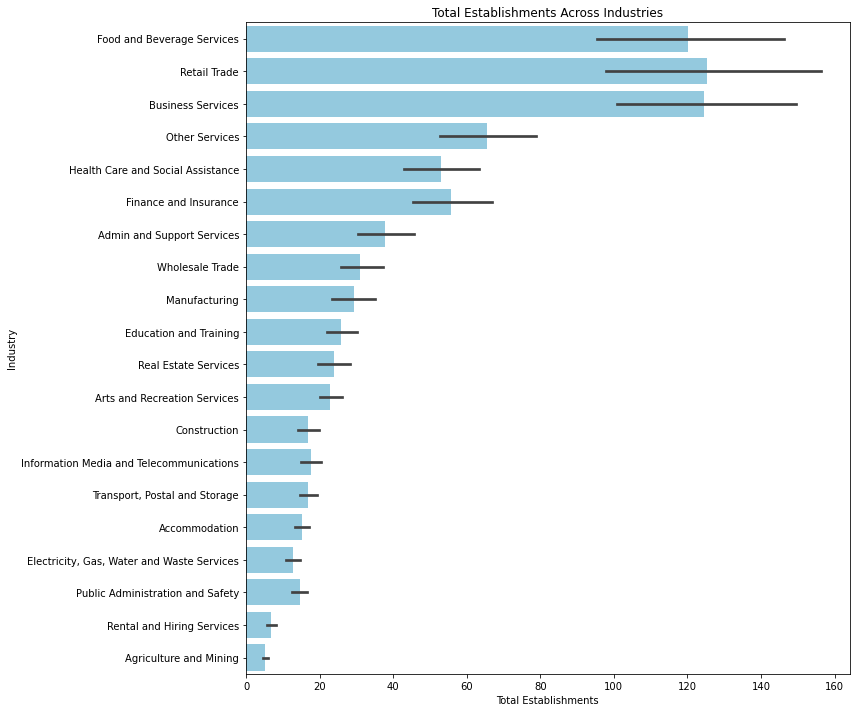

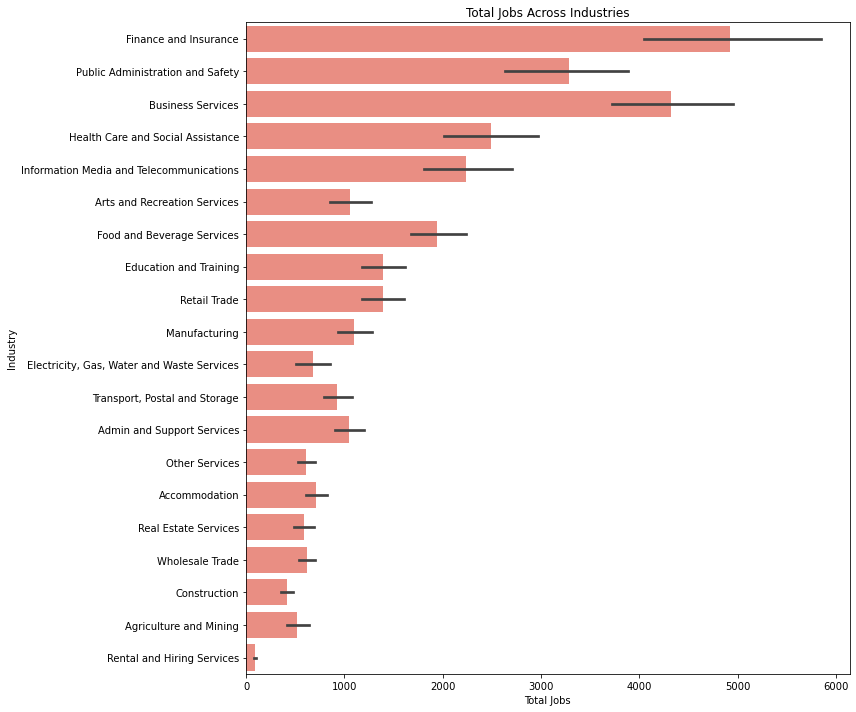

In [20]:
# Sort industries by total jobs 
df_sorted_jobs = buss_est.sort_values(by='total_jobs', ascending=False)
df_sorted_establishments = buss_est.sort_values(by='total_establishments', ascending=False)

df_sorted_jobs = df_sorted_jobs[df_sorted_jobs['clue_industry'] != 'All CLUE Industry']
df_sorted_establishments = df_sorted_establishments[df_sorted_establishments['clue_industry'] != 'All CLUE Industry']

# Visualize total establishments by industry 
plt.figure(figsize=(12, 10))
sns.barplot(x='total_establishments', y='clue_industry', data=df_sorted_establishments, color='skyblue')
plt.xlabel('Total Establishments')
plt.ylabel('Industry')
plt.title('Total Establishments Across Industries')
plt.tight_layout()
plt.show()

# Visualize total jobs by industry 
plt.figure(figsize=(12, 10))
sns.barplot(x='total_jobs', y='clue_industry', data=df_sorted_jobs, color='salmon')
plt.xlabel('Total Jobs')
plt.ylabel('Industry')
plt.title('Total Jobs Across Industries')
plt.tight_layout()
plt.show()

In [21]:
# Group by census_year, clue_small_area, and sum total_jobs
grouped_df = buss_est.groupby(['census_year', 'clue_small_area'])['total_jobs'].sum().reset_index()

grouped_df

,census_year,clue_small_area,total_jobs
0,2002,Carlton,14051.0
1,2002,City of Melbourne (total),638150.0
2,2002,Docklands,4103.0
3,2002,East Melbourne,15623.0
4,2002,Kensington,1141.0
...,...,...,...
289,2022,Port Melbourne,11269.0
290,2022,South Yarra,316.0
291,2022,Southbank,37788.0
292,2022,West Melbourne (Industrial),4239.0


In [22]:
buss_est

,census_year,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,2007,West Melbourne (Residential),"Transport, Postal and Warehousing","Transport, Postal and Storage",Small business,20,132.0
1,2006,Carlton,Accommodation and Food Services,Accommodation,Small business,17,102.0
2,2006,Carlton,Administrative and Support Services,Admin and Support Services,Non employing,1,NaN
3,2006,Carlton,Arts and Recreation Services,Arts and Recreation Services,Medium business,4,207.0
4,2006,Carlton,Construction,Construction,Medium business,5,196.0
...,...,...,...,...,...,...,...
14687,2008,Kensington,"Rental, Hiring and Real Estate Services",Real Estate Services,Medium business,1,NaN
14688,2008,Kensington,Retail Trade,Retail Trade,Medium business,2,NaN
14689,2008,Kensington,"Transport, Postal and Warehousing","Transport, Postal and Storage",Medium business,3,118.0
14690,2008,Kensington,"Transport, Postal and Warehousing","Transport, Postal and Storage",Small business,8,32.0


### Choose features for applying model

In [23]:
df_fc = buss_est.drop(['census_year'], axis = 1)
df_fc

,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,West Melbourne (Residential),"Transport, Postal and Warehousing","Transport, Postal and Storage",Small business,20,132.0
1,Carlton,Accommodation and Food Services,Accommodation,Small business,17,102.0
2,Carlton,Administrative and Support Services,Admin and Support Services,Non employing,1,NaN
3,Carlton,Arts and Recreation Services,Arts and Recreation Services,Medium business,4,207.0
4,Carlton,Construction,Construction,Medium business,5,196.0
...,...,...,...,...,...,...
14687,Kensington,"Rental, Hiring and Real Estate Services",Real Estate Services,Medium business,1,NaN
14688,Kensington,Retail Trade,Retail Trade,Medium business,2,NaN
14689,Kensington,"Transport, Postal and Warehousing","Transport, Postal and Storage",Medium business,3,118.0
14690,Kensington,"Transport, Postal and Warehousing","Transport, Postal and Storage",Small business,8,32.0


### Print rows with NaN values in 'total_jobs' column


In [24]:
nan_rows = df_fc[df_fc['total_jobs'].isnull()]
nan_rows

,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
2,Carlton,Administrative and Support Services,Admin and Support Services,Non employing,1,NaN
6,Carlton,Financial and Insurance Services,Finance and Insurance,Non employing,1,NaN
13,Carlton,"Rental, Hiring and Real Estate Services",Rental and Hiring Services,Small business,2,NaN
17,Docklands,Accommodation and Food Services,Food and Beverage Services,Large business,1,NaN
18,Docklands,Accommodation and Food Services,Accommodation,Medium business,2,NaN
...,...,...,...,...,...,...
14680,Kensington,"Agriculture, Forestry and Fishing",Agriculture and Mining,Small business,1,NaN
14685,Kensington,Public Administration and Safety,Public Administration and Safety,Medium business,1,NaN
14686,Kensington,Public Administration and Safety,Public Administration and Safety,Non employing,2,NaN
14687,Kensington,"Rental, Hiring and Real Estate Services",Real Estate Services,Medium business,1,NaN


As we can see from the data the nan values of total jobs come along with the small number of total establishments, so we can replace nan with 0

### Replace NaN values with 0

In [25]:
df_fc['total_jobs'] = df_fc['total_jobs'].fillna(0)
df_fc.head()

,clue_small_area,anzsic_indusrty,clue_industry,business_size,total_establishments,total_jobs
0,West Melbourne (Residential),"Transport, Postal and Warehousing","Transport, Postal and Storage",Small business,20,132.0
1,Carlton,Accommodation and Food Services,Accommodation,Small business,17,102.0
2,Carlton,Administrative and Support Services,Admin and Support Services,Non employing,1,0.0
3,Carlton,Arts and Recreation Services,Arts and Recreation Services,Medium business,4,207.0
4,Carlton,Construction,Construction,Medium business,5,196.0


In [26]:
df_fc.shape

(14692, 6)

### Applying model

In [27]:

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df_fc, columns=['clue_small_area', 'anzsic_indusrty', 'clue_industry', 'business_size'])

# Split data into features (X) and target variable (y)
X = df.drop(['total_jobs'], axis=1)
y = df['total_jobs']

# Split data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

### Model evaluation

In [28]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False returns RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 124.37297335482832
Root Mean Squared Error (RMSE): 721.7370221578113
R-squared (R2) Score: 0.9959365504571064


#### Overall, based on these metrics, your Random Forest Regression model seems to be performing very well in forecasting total jobs. The high R-squared score suggests that the model fits the data very closely, and the low MAE and RMSE indicate that the model's predictions are generally accurate.

### Dataset 4: Jobs per CLUE industry for blocks


In [29]:
dataset_id_4 = 'employment-by-block-by-clue-industry'
clue_ind = datasetcollect(dataset_id_4)
print(len(clue_ind))


12394


In [30]:
clue_ind.head()

,census_year,block_id,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,electricity_gas_water_and_waste_services,finance_and_insurance,food_and_beverage_services,health_care_and_social_assistance,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
0,2006,603,East Melbourne,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,8.0
1,2006,604,East Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
2,2006,606,East Melbourne,12.0,0.0,0.0,0.0,29.0,NaN,0.0,0.0,0.0,NaN,19.0,NaN,NaN,21.0,NaN,0.0,0.0,0.0,NaN,NaN,168.0
3,2006,609,East Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,2006,610,East Melbourne,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [31]:
clue_ind.tail()

,census_year,block_id,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,electricity_gas_water_and_waste_services,finance_and_insurance,food_and_beverage_services,health_care_and_social_assistance,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
12389,2016,0,City of Melbourne (total),10809.0,14992.0,3841.0,23515.0,77136.0,5678.0,24180.0,9675.0,63418.0,35506.0,39584.0,28685.0,15335.0,12514.0,39510.0,5078.0,463.0,20342.0,15903.0,7289.0,453453.0
12390,2015,0,City of Melbourne (total),10057.0,14841.0,3896.0,23374.0,76273.0,5741.0,24751.0,9805.0,63108.0,33522.0,37793.0,28502.0,14992.0,12267.0,37643.0,4534.0,627.0,19802.0,14444.0,10799.0,446771.0
12391,2013,0,City of Melbourne (total),10162.0,14421.0,3959.0,22988.0,71527.0,6106.0,23613.0,8367.0,60467.0,33117.0,37032.0,30168.0,15336.0,11753.0,40387.0,4154.0,618.0,19392.0,14947.0,10982.0,439496.0
12392,2011,0,City of Melbourne (total),8955.0,14789.0,3806.0,21864.0,71976.0,4938.0,23579.0,6975.0,59465.0,27808.0,35568.0,33181.0,16214.0,11184.0,41143.0,3874.0,882.0,21290.0,14280.0,10741.0,432512.0
12393,2005,0,City of Melbourne (total),7135.0,10328.0,3438.0,21526.0,50097.0,2737.0,20045.0,3425.0,47664.0,21024.0,29160.0,26637.0,13523.0,9833.0,31345.0,2370.0,803.0,18504.0,11894.0,7642.0,339130.0


In [32]:
clue_ind.count()

census_year                                 12394
block_id                                    12394
clue_small_area                             12394
accommodation                                9986
admin_and_support_services                  10375
agriculture_and_mining                      11795
arts_and_recreation_services                 8467
business_services                           10519
construction                                10319
education_and_training                       9841
electricity_gas_water_and_waste_services     9926
finance_and_insurance                       10816
food_and_beverage_services                   9766
health_care_and_social_assistance            9834
information_media_and_telecommunications    10096
manufacturing                               10085
other_services                               9114
public_administration_and_safety            10542
real_estate_services                        10603
rental_and_hiring_services                  11534


In [33]:
# Check for missing values
print("Missing values in clue_ind:\n", clue_ind.isnull().sum())


Missing values in clue_ind:
 census_year                                    0
block_id                                       0
clue_small_area                                0
accommodation                               2408
admin_and_support_services                  2019
agriculture_and_mining                       599
arts_and_recreation_services                3927
business_services                           1875
construction                                2075
education_and_training                      2553
electricity_gas_water_and_waste_services    2468
finance_and_insurance                       1578
food_and_beverage_services                  2628
health_care_and_social_assistance           2560
information_media_and_telecommunications    2298
manufacturing                               2309
other_services                              3280
public_administration_and_safety            1852
real_estate_services                        1791
rental_and_hiring_services              

In [34]:
clue_ind.fillna(0, inplace=True)


In [35]:
clue_ind.count()

census_year                                 12394
block_id                                    12394
clue_small_area                             12394
accommodation                               12394
admin_and_support_services                  12394
agriculture_and_mining                      12394
arts_and_recreation_services                12394
business_services                           12394
construction                                12394
education_and_training                      12394
electricity_gas_water_and_waste_services    12394
finance_and_insurance                       12394
food_and_beverage_services                  12394
health_care_and_social_assistance           12394
information_media_and_telecommunications    12394
manufacturing                               12394
other_services                              12394
public_administration_and_safety            12394
real_estate_services                        12394
rental_and_hiring_services                  12394


In [36]:
clue_ind

,census_year,block_id,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,electricity_gas_water_and_waste_services,finance_and_insurance,food_and_beverage_services,health_care_and_social_assistance,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
0,2006,603,East Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,2006,604,East Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006,606,East Melbourne,12.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,168.0
3,2006,609,East Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2006,610,East Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,2016,0,City of Melbourne (total),10809.0,14992.0,3841.0,23515.0,77136.0,5678.0,24180.0,9675.0,63418.0,35506.0,39584.0,28685.0,15335.0,12514.0,39510.0,5078.0,463.0,20342.0,15903.0,7289.0,453453.0
12390,2015,0,City of Melbourne (total),10057.0,14841.0,3896.0,23374.0,76273.0,5741.0,24751.0,9805.0,63108.0,33522.0,37793.0,28502.0,14992.0,12267.0,37643.0,4534.0,627.0,19802.0,14444.0,10799.0,446771.0
12391,2013,0,City of Melbourne (total),10162.0,14421.0,3959.0,22988.0,71527.0,6106.0,23613.0,8367.0,60467.0,33117.0,37032.0,30168.0,15336.0,11753.0,40387.0,4154.0,618.0,19392.0,14947.0,10982.0,439496.0
12392,2011,0,City of Melbourne (total),8955.0,14789.0,3806.0,21864.0,71976.0,4938.0,23579.0,6975.0,59465.0,27808.0,35568.0,33181.0,16214.0,11184.0,41143.0,3874.0,882.0,21290.0,14280.0,10741.0,432512.0


In [37]:
clue_ind['census_year'] = pd.to_datetime(clue_ind['census_year'], format='%Y')
clue_ind = clue_ind.sort_values('census_year')


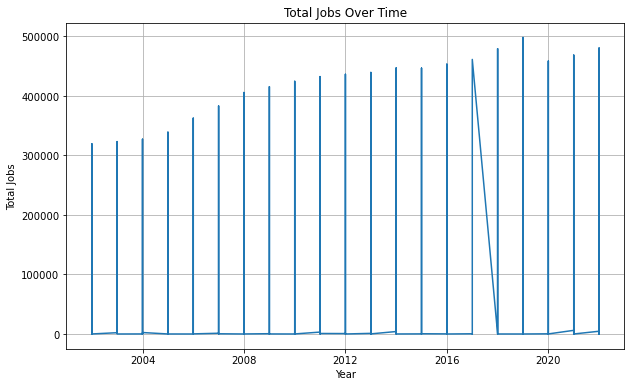

In [38]:

# Plotting total jobs over time
plt.figure(figsize=(10, 6))
plt.plot(clue_ind['census_year'], clue_ind['total_jobs_in_block'])
plt.xlabel('Year')
plt.ylabel('Total Jobs')
plt.title('Total Jobs Over Time')
plt.grid(True)
plt.show()


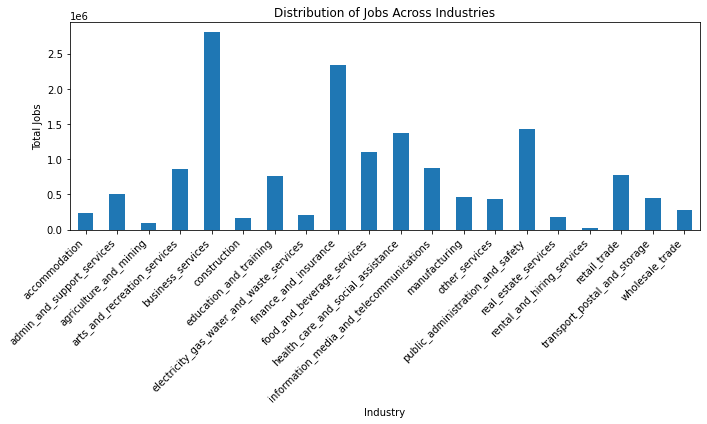

In [39]:
# Create a bar chart for industry distribution
industry_columns = clue_ind.columns[3:-1]  # Exclude non-industry columns
industry_sums = clue_ind[industry_columns].sum()
plt.figure(figsize=(10, 6))
industry_sums.plot(kind='bar')
plt.xlabel('Industry')
plt.ylabel('Total Jobs')
plt.title('Distribution of Jobs Across Industries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

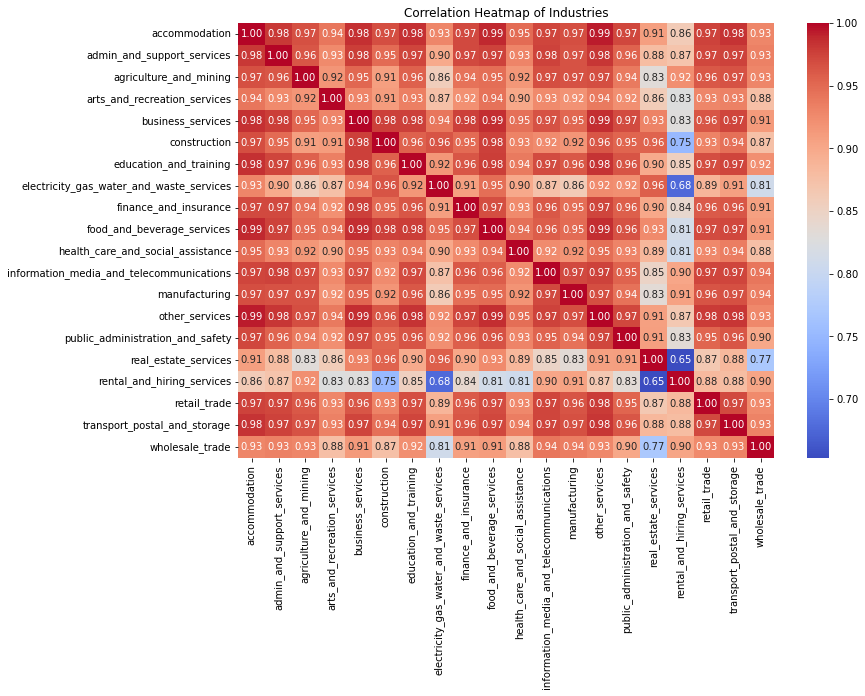

In [40]:

# Compute correlation matrix
corr_matrix = clue_ind[industry_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Industries')
plt.show()


In [41]:
total_blocks = clue_ind['block_id'].unique()
total_blocks

array([  38,  329,  333,  337,  339,  342,  343,  328,  346,  353,  354,
        360,  363,  368,  372,  352,  376,  325,  320,  258,  264,  265,
        269,  270,  304,  321,  305,  308,  312,  313,  317,  318,  319,
        306,  377,  379,  405,  523,  526,  529,  530,  531,  535,  518,
        538,  543,  544,  545,  546,  548,  551,  542,  511,  510,  505,
        407,  410,  412,  413,  418,  419,  423,  425,  429,  433,  437,
        441,  442,  501,  502,  255,  251,  250,  249,   74,   77,   83,
         87,   88,   91,   73,  104,  111,  113,  114,  115,  125,  131,
        105,   71,   68,   56,    4,    6,   11,   13,   14,   15,   18,
         22,   27,   41,   44,   47,   48,   53,   55,  203,  554,  207,
        211,   62,   64,   66,   78,   81,   86,   61,   93,  204,  205,
        206,  217,  229,  238,  103,   52,   51,   42,  212,  213,  214,
        219,  220,   12,   16,   17,   21,   24,   28,   32,   33,   35,
         37,  209,  555,  559,  561,  438,  435,  4

As there are many block id, we drop this column and focus on clue small area column to forecast the total job

In [42]:
df = clue_ind.drop('block_id', axis=1)
df.tail()

,census_year,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,electricity_gas_water_and_waste_services,finance_and_insurance,food_and_beverage_services,health_care_and_social_assistance,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
4222,2022-01-01,North Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,22.0,0.0,0.0,107.0
4223,2022-01-01,North Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4224,2022-01-01,North Melbourne,0.0,0.0,0.0,0.0,57.0,0.0,60.0,0.0,0.0,77.0,15.0,0.0,0.0,10.0,0.0,0.0,0.0,47.0,0.0,10.0,322.0
4214,2022-01-01,North Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8343,2022-01-01,North Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
area_job_sum = df.groupby('clue_small_area')['total_jobs_in_block'].sum()
area_job_sum

clue_small_area
Carlton                          350122.0
City of Melbourne (total)       8803643.0
Docklands                        857046.0
East Melbourne                   445854.0
Kensington                       118612.0
Melbourne (CBD)                 4444043.0
Melbourne (Remainder)            448115.0
North Melbourne                  180542.0
Parkville                        504094.0
Port Melbourne                   263459.0
South Yarra                       13935.0
Southbank                        783246.0
West Melbourne (Industrial)      117622.0
West Melbourne (Residential)     127419.0
Name: total_jobs_in_block, dtype: float64

In [44]:
df = df.reset_index()


In [45]:
df = df.drop('index', axis=1)

In [46]:
df

,census_year,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,electricity_gas_water_and_waste_services,finance_and_insurance,food_and_beverage_services,health_care_and_social_assistance,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
0,2002-01-01,Melbourne (CBD),0.0,53.0,0.0,0.0,461.0,37.0,77.0,0.0,859.0,205.0,405.0,45.0,45.0,114.0,0.0,0.0,0.0,51.0,40.0,0.0,2452.0
1,2002-01-01,North Melbourne,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0
2,2002-01-01,North Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,17.0,0.0,21.0,80.0
3,2002-01-01,North Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,258.0
4,2002-01-01,North Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,2022-01-01,North Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,22.0,0.0,0.0,107.0
12390,2022-01-01,North Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12391,2022-01-01,North Melbourne,0.0,0.0,0.0,0.0,57.0,0.0,60.0,0.0,0.0,77.0,15.0,0.0,0.0,10.0,0.0,0.0,0.0,47.0,0.0,10.0,322.0
12392,2022-01-01,North Melbourne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
grouped_data = df.groupby(['census_year', 'clue_small_area']).sum()
grouped_data

accommodation  \
census_year clue_small_area                               
2002-01-01  Carlton                                66.0   
            City of Melbourne (total)            7265.0   
            Docklands                               0.0   
            East Melbourne                        129.0   
            Kensington                              0.0   
...                                                 ...   
2022-01-01  Port Melbourne                          0.0   
            South Yarra                             0.0   
            Southbank                             115.0   
            West Melbourne (Industrial)             0.0   
            West Melbourne (Residential)            0.0   

                                          admin_and_support_services  \
census_year clue_small_area                                            
2002-01-01  Carlton                                             71.0   
            City of Melbourne (total)                        10621.0   
            Docklands                                          476.0   
            East Melbourne                                     148.0   
            Kensington                                           0.0   
...                                                              ...   
2022-01-01  Port Melbourne                                     486.0   
            South Yarra                                          0.0   
            Southbank                                         1075.0   
            West Melbourne (Industrial)                          0.0   
            West Melbourne (Residential)                         0.0   

                                          agriculture_and_mining  \
census_year clue_small_area                                        
2002-01-01  Carlton                                          0.0   
            City of Melbourne (total)                     4483.0   
            Docklands                                        0.0   
            East Melbourne                                   0.0   
            Kensington                                       0.0   
...                                                          ...   
2022-01-01  Port Melbourne                                   0.0   
            South Yarra                                      0.0   
            Southbank                                        0.0   
            West Melbourne (Industrial)                      0.0   
            West Melbourne (Residential)                     0.0   

                                          arts_and_recreation_services  \
census_year clue_small_area                                              
2002-01-01  Carlton                                                7.0   
            City of Melbourne (total)                          18913.0   
            Docklands                                            667.0   
            East Melbourne                                      1566.0   
            Kensington                                             2.0   
...                                                                ...   
2022-01-01  Port Melbourne                                         7.0   
            South Yarra                                            7.0   
            Southbank                                           9595.0   
            West Melbourne (Industrial)                            0.0   
            West Melbourne (Residential)                          15.0   

                                          business_services  construction  \
census_year clue_small_area                                                 
2002-01-01  Carlton                                  1256.0           0.0   
            City of Melbourne (total)               48302.0        2548.0   
            Docklands                                  26.0          23.0   
            East Melbourne                            952.0           0.0   
            Kensington     

In [48]:
grouped_data.reset_index(inplace=True)
grouped_data

,census_year,clue_small_area,accommodation,admin_and_support_services,agriculture_and_mining,arts_and_recreation_services,business_services,construction,education_and_training,electricity_gas_water_and_waste_services,finance_and_insurance,food_and_beverage_services,health_care_and_social_assistance,information_media_and_telecommunications,manufacturing,other_services,public_administration_and_safety,real_estate_services,rental_and_hiring_services,retail_trade,transport_postal_and_storage,wholesale_trade,total_jobs_in_block
0,2002-01-01,Carlton,66.0,71.0,0.0,7.0,1256.0,0.0,1268.0,0.0,213.0,1237.0,3063.0,0.0,43.0,1045.0,0.0,0.0,0.0,1095.0,0.0,0.0,15452.0
1,2002-01-01,City of Melbourne (total),7265.0,10621.0,4483.0,18913.0,48302.0,2548.0,15806.0,3022.0,44975.0,17145.0,27482.0,25083.0,14638.0,8994.0,30233.0,2352.0,1385.0,16973.0,12900.0,6609.0,319729.0
2,2002-01-01,Docklands,0.0,476.0,0.0,667.0,26.0,23.0,0.0,0.0,0.0,719.0,0.0,0.0,0.0,28.0,2980.0,24.0,0.0,18.0,793.0,0.0,6781.0
3,2002-01-01,East Melbourne,129.0,148.0,0.0,1566.0,952.0,0.0,218.0,0.0,1533.0,78.0,3490.0,0.0,0.0,311.0,3101.0,29.0,0.0,14.0,0.0,0.0,19548.0
4,2002-01-01,Kensington,0.0,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0,242.0,14.0,0.0,0.0,0.0,0.0,0.0,145.0,2834.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,2022-01-01,Port Melbourne,0.0,486.0,0.0,7.0,1158.0,980.0,15.0,11.0,0.0,16.0,0.0,179.0,3552.0,124.0,90.0,0.0,71.0,213.0,1110.0,816.0,12737.0
290,2022-01-01,South Yarra,0.0,0.0,0.0,7.0,0.0,0.0,40.0,0.0,0.0,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,933.0
291,2022-01-01,Southbank,115.0,1075.0,0.0,9595.0,7139.0,658.0,386.0,200.0,797.0,3431.0,290.0,662.0,2763.0,496.0,0.0,112.0,0.0,1832.0,283.0,492.0,42423.0
292,2022-01-01,West Melbourne (Industrial),0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0,67.0,2596.0,447.0,3770.0


In [49]:
df_filtered = grouped_data[['census_year', 'clue_small_area', 'total_jobs_in_block']]
df_filtered

,census_year,clue_small_area,total_jobs_in_block
0,2002-01-01,Carlton,15452.0
1,2002-01-01,City of Melbourne (total),319729.0
2,2002-01-01,Docklands,6781.0
3,2002-01-01,East Melbourne,19548.0
4,2002-01-01,Kensington,2834.0
...,...,...,...
289,2022-01-01,Port Melbourne,12737.0
290,2022-01-01,South Yarra,933.0
291,2022-01-01,Southbank,42423.0
292,2022-01-01,West Melbourne (Industrial),3770.0


In [50]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_filtered['clue_small_area_encoded'] = label_encoder.fit_transform(df_filtered['clue_small_area'])
df_filtered

,census_year,clue_small_area,total_jobs_in_block,clue_small_area_encoded
0,2002-01-01,Carlton,15452.0,0
1,2002-01-01,City of Melbourne (total),319729.0,1
2,2002-01-01,Docklands,6781.0,2
3,2002-01-01,East Melbourne,19548.0,3
4,2002-01-01,Kensington,2834.0,4
...,...,...,...,...
289,2022-01-01,Port Melbourne,12737.0,9
290,2022-01-01,South Yarra,933.0,10
291,2022-01-01,Southbank,42423.0,11
292,2022-01-01,West Melbourne (Industrial),3770.0,12


In [51]:
df_filtered[df_filtered['census_year'] == "2002-01-01"]

,census_year,clue_small_area,total_jobs_in_block,clue_small_area_encoded
0,2002-01-01,Carlton,15452.0,0
1,2002-01-01,City of Melbourne (total),319729.0,1
2,2002-01-01,Docklands,6781.0,2
3,2002-01-01,East Melbourne,19548.0,3
4,2002-01-01,Kensington,2834.0,4
5,2002-01-01,Melbourne (CBD),175912.0,5
6,2002-01-01,Melbourne (Remainder),15303.0,6
7,2002-01-01,North Melbourne,7106.0,7
8,2002-01-01,Parkville,15614.0,8
9,2002-01-01,Port Melbourne,10285.0,9


In [52]:
df_filtered['census_year'] = df_filtered['census_year'].dt.year


In [53]:
df_filtered['census_year']

0      2002
1      2002
2      2002
3      2002
4      2002
       ... 
289    2022
290    2022
291    2022
292    2022
293    2022
Name: census_year, Length: 294, dtype: int64

In [54]:
df_filtered

,census_year,clue_small_area,total_jobs_in_block,clue_small_area_encoded
0,2002,Carlton,15452.0,0
1,2002,City of Melbourne (total),319729.0,1
2,2002,Docklands,6781.0,2
3,2002,East Melbourne,19548.0,3
4,2002,Kensington,2834.0,4
...,...,...,...,...
289,2022,Port Melbourne,12737.0,9
290,2022,South Yarra,933.0,10
291,2022,Southbank,42423.0,11
292,2022,West Melbourne (Industrial),3770.0,12


In [55]:

# Define features and target variable
X = df_filtered[['census_year', 'clue_small_area_encoded']]
y = df_filtered['total_jobs_in_block']

# Random train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Now, for prediction in the next year (e.g., 2023), use the trained model
# assuming you have encoded 2023 as 'next_year_encoded' and area of interest as 'area_encoded'
next_year_encoded = 2023
area_encoded = 1  # Provide the encoded value for the area you want to predict

# Predict total jobs for the next year and specific area
next_year_prediction = model.predict([[next_year_encoded, area_encoded]])
print(f'Predicted total jobs in {next_year_encoded} for area {area_encoded}: {next_year_prediction}')

Mean Absolute Error: 69257.05492646972
Predicted total jobs in 2023 for area 1: [156920.68561032]


In [56]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error: 69257.05492646972
Mean Squared Error: 8841311399.432346
Root Mean Squared Error: 94028.24788026387
R-squared (R2) Score: -0.001710204525600112


In [57]:
# Split the data into training and testing sets
X = df_filtered[['census_year', 'clue_small_area_encoded']]
y = df_filtered['total_jobs_in_block']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
y_train

181      4993.0
209      5018.0
168     16224.0
6       15303.0
224     17037.0
         ...   
188     23091.0
71     383135.0
106     21590.0
270      7261.0
102      4739.0
Name: total_jobs_in_block, Length: 235, dtype: float64

In [59]:

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 7869948981.435795
R-squared Score: 0.029429279760268545


In [61]:
y_pred

array([ 73037.50924698,  19753.61193743,  69300.23606824, 131604.08740005,
        40048.50848751, -22255.3428443 ,  14888.84450591,  22781.30427538,
         2131.61730491, 137951.13950475, -12880.59840165,  86922.23070076,
        19398.82151703, 139078.63375754,  92559.70196467, 139851.33758992,
       100806.95215454, 110954.40042958, 151481.07053814,  70782.52074142,
        66690.45714228,  26163.78703373,  36666.02572916, 130831.38356767,
        79447.68434328,  64790.25905711,  88049.72495355,  -4988.13863218,
        41176.00274029,  25391.08320134,  61052.98587837, 144716.10502145,
         1776.82688451,  56543.00886724,  99679.45790176,  -9498.11564331,
        49778.04335055,  49423.25293016,   4031.81539008,  16789.04259107,
       141333.6222631 ,  80575.17859606,  -4633.34821178,  76419.99200533,
        15661.54833829,  84312.4517748 ,   2904.32113729, -16617.87158039,
       111309.19084998,  33638.33339121, 102707.15023971,   8123.87898922,
       146971.09352701,  

In [62]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared Score: {r2_rf}")

Random Forest Mean Squared Error: 4769625.152377971
Random Forest R-squared Score: 0.9994117803647347


In [63]:
df_2023 = pd.DataFrame({'census_year': [2023] * len(df_filtered['clue_small_area_encoded'].unique())})
df_2023['clue_small_area_encoded'] = df_filtered['clue_small_area_encoded'].unique()
predictions_2023_rf = rf_model.predict(df_2023[['census_year', 'clue_small_area_encoded']])
df_2023['predicted_total_jobs_2023_rf'] = predictions_2023_rf

# Display predicted total jobs for 2023 in different areas using the best model
round(df_2023[['clue_small_area_encoded', 'predicted_total_jobs_2023_rf']])

,clue_small_area_encoded,predicted_total_jobs_2023_rf
0,0,14914.0
1,1,477289.0
2,2,73064.0
3,3,20706.0
4,4,7317.0
5,5,225878.0
6,6,23069.0
7,7,10197.0
8,8,33101.0
9,9,14896.0


In [64]:
# Merge predictions with the actual data for visualization
df_plot = pd.concat([df_filtered, df_2023])
df_plot

,census_year,clue_small_area,total_jobs_in_block,clue_small_area_encoded,predicted_total_jobs_2023_rf
0,2002,Carlton,15452.0,0,NaN
1,2002,City of Melbourne (total),319729.0,1,NaN
2,2002,Docklands,6781.0,2,NaN
3,2002,East Melbourne,19548.0,3,NaN
4,2002,Kensington,2834.0,4,NaN
...,...,...,...,...,...
9,2023,NaN,NaN,9,14895.51
10,2023,NaN,NaN,10,921.24
11,2023,NaN,NaN,11,42516.96
12,2023,NaN,NaN,12,2763.86


In [65]:
df_plot['clue_small_area_encoded'] = label_encoder.inverse_transform(df_plot['clue_small_area_encoded'])
df_plot

,census_year,clue_small_area,total_jobs_in_block,clue_small_area_encoded,predicted_total_jobs_2023_rf
0,2002,Carlton,15452.0,Carlton,NaN
1,2002,City of Melbourne (total),319729.0,City of Melbourne (total),NaN
2,2002,Docklands,6781.0,Docklands,NaN
3,2002,East Melbourne,19548.0,East Melbourne,NaN
4,2002,Kensington,2834.0,Kensington,NaN
...,...,...,...,...,...
9,2023,NaN,NaN,Port Melbourne,14895.51
10,2023,NaN,NaN,South Yarra,921.24
11,2023,NaN,NaN,Southbank,42516.96
12,2023,NaN,NaN,West Melbourne (Industrial),2763.86


In [66]:
# Move predicted_total_jobs_2023_rf values to total_jobs_in_block for census year 2023
df_plot.loc[df_plot['census_year'] == 2023, 'total_jobs_in_block'] = df_plot.loc[df_plot['census_year'] == 2023, 'predicted_total_jobs_2023_rf']
df_plot

,census_year,clue_small_area,total_jobs_in_block,clue_small_area_encoded,predicted_total_jobs_2023_rf
0,2002,Carlton,15452.00,Carlton,NaN
1,2002,City of Melbourne (total),319729.00,City of Melbourne (total),NaN
2,2002,Docklands,6781.00,Docklands,NaN
3,2002,East Melbourne,19548.00,East Melbourne,NaN
4,2002,Kensington,2834.00,Kensington,NaN
...,...,...,...,...,...
9,2023,NaN,14895.51,Port Melbourne,14895.51
10,2023,NaN,921.24,South Yarra,921.24
11,2023,NaN,42516.96,Southbank,42516.96
12,2023,NaN,2763.86,West Melbourne (Industrial),2763.86


In [67]:
df_plot = df_plot.drop(['clue_small_area','predicted_total_jobs_2023_rf'], axis=1)
df_plot

,census_year,total_jobs_in_block,clue_small_area_encoded
0,2002,15452.00,Carlton
1,2002,319729.00,City of Melbourne (total)
2,2002,6781.00,Docklands
3,2002,19548.00,East Melbourne
4,2002,2834.00,Kensington
...,...,...,...
9,2023,14895.51,Port Melbourne
10,2023,921.24,South Yarra
11,2023,42516.96,Southbank
12,2023,2763.86,West Melbourne (Industrial)


In [68]:
from geopy.geocoders import Nominatim


In [69]:
geolocator = Nominatim(user_agent="my_geocoder")


In [70]:
# Initialize empty lists to store latitudes and longitudes
latitudes = []
longitudes = []

# Iterate over DataFrame rows and geocode locations
for index, row in df_plot.iterrows():
    location = geolocator.geocode(row['clue_small_area_encoded'] + ", Melbourne, Australia")
    if location:
        lat = location.latitude
        lon = location.longitude
        latitudes.append(lat)
        longitudes.append(lon)
        print(f"Location: {row['clue_small_area_encoded']} | Lat: {lat} | Lon: {lon}")
    else:
        latitudes.append(None)
        longitudes.append(None)
        print(f"Location {row['clue_small_area_encoded']} not found.")



Location: Carlton | Lat: -37.8004228 | Lon: 144.9684343


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=City+of+Melbourne+%28total%29%2C+Melbourne%2C+Australia&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [ ]:
# Add latitudes and longitudes to DataFrame
df_plot['lat'] = latitudes
df_plot['lon'] = longitudes
df_plot

In [ ]:
df_plot = df_plot.dropna(subset=['lat', 'lon'])
df_plot

In [ ]:
df_2023 = df_plot[df_plot['census_year'] == 2023]
df_2023

In [ ]:
import folium
from folium.plugins import MarkerCluster, Search

# Create a map centered around Melbourne
melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=12)
marker_cluster = MarkerCluster().add_to(melbourne_map)

# Add markers for each location with total jobs information in popup
for index, row in df_2023.iterrows():
    radius = row['total_jobs_in_block'] / 3000  # Adjust scaling factor as needed
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=radius,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"{row['clue_small_area_encoded']}<br>Total Jobs: {row['total_jobs_in_block']}"
    ).add_to(melbourne_map)
folium.LayerControl().add_to(melbourne_map)



melbourne_map.get_root().html.add_child(folium.Element(dropdown_html + dropdown_script))
# Display the map
melbourne_map.save('melbourne_map_total_jobs.html')

In [ ]:
melbourne_map